In [1]:
import os
#path = os.path.abspath(os.path.join('..','..'))
#print(path)
#import sys

#sys.path.insert(0,path)
#print(sys.executable)

from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, CashFlowInput, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
cashflow_params = {
        'params_list': [
            {
                'name':'fix_opex',
                'const_value':-5000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-5,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':60,
                'target':'income',
                'multiply':'oil_volume'
            }
        ]
    }

In [3]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.3,
        'freq_di':'A',
        'qi':[80,100,1000],
        'b':0,
        'fluid_rate':1200
    },
    'start':'2021-01-01',
    'end':'2022-01-01',
    'freq_input':'M',
    'freq_output':'M'
}




p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: [80.0, 100.0, 1000.0] bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2022, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=None, cashflow=None, depends=None, forecast=None)

In [4]:
p2_dict = {
    'name':'pud',
    'dca': {
        'ti':'2022-01-01',
        'di':0.3,
        'freq_di':'A',
        'qi':300,
        'b':0,
        'fluid_rate':600
    },
    'start':'2022-01-01',
    'end':'2023-01-01',
    'freq_input':'M',
    'freq_output':'M'
}




p2 = Period(**p2_dict)
p2

Period(name='pud', dca=Declination 
 Ti: 2022-01-01 
 Qi: 300.0 bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2022, 1, 1), end=datetime.date(2023, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=None, cashflow=None, depends=None, forecast=None)

In [5]:
s1 = Scenario(name='base', periods=[p1,p2], cashflow_params=cashflow_params)
s1

Scenario(name='base', periods=[Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: [80.0, 100.0, 1000.0] bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2022, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=None, cashflow=None, depends=None, forecast=None), Period(name='pud', dca=Declination 
 Ti: 2022-01-01 
 Qi: 300.0 bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2022, 1, 1), end=datetime.date(2023, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=None, cashflow=None, depends=None, forecast=None)], cashflow_params=CashFlowInput(params_list=[CashFlowParams(name='fix_opex', const_value=-5000.0, array_values=None, target='opex', multiply=None, agg='sum', wi=1), CashFlowParams(name='var_opex', const_value=-5.0, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1), CashFlowParams(nam

In [6]:
s1_f = s1.generate_forecast()
s1_f

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period,scenario
date,,,,,,,,,,,,,,
2021-01,80.000000,0.000000,0,0.000000,1200.0,1120.000000,0.933333,14.000000,0.000000,0.0,0.000000,0.0,pdp,base
2021-02,77.987393,2448.672116,0,2448.672116,1200.0,1122.012607,0.935011,14.387102,34782.390824,37200.0,34782.390824,37200.0,pdp,base
2021-03,76.213109,4607.383867,0,2158.711751,1200.0,1123.786891,0.936489,14.745323,66248.423768,70800.0,31466.032944,33600.0,pdp,base
2021-04,74.295771,6940.145308,0,2332.761441,1200.0,1125.704229,0.938087,15.151660,101145.254867,108000.0,34896.831100,37200.0,pdp,base
2021-05,72.486222,9141.763651,0,2201.618343,1200.0,1127.513778,0.939595,15.554870,134970.668217,144000.0,33825.413350,36000.0,pdp,base
2021-06,70.662643,11360.451023,0,2218.687372,1200.0,1129.337357,0.941114,15.982099,169980.126285,181200.0,35009.458067,37200.0,pdp,base
2021-07,68.941582,13454.408309,0,2093.957286,1200.0,1131.058418,0.942549,16.406041,203911.878818,217200.0,33931.752534,36000.0,pdp,base
2021-08,67.207178,15564.599934,0,2110.191625,1200.0,1132.792822,0.943994,16.855236,239028.456296,254400.0,35116.577478,37200.0,pdp,base
2021-09,65.516407,17621.704223,0,2057.104289,1200.0,1134.483593,0.945403,17.316023,274197.447664,291600.0,35168.991368,37200.0,pdp,base


<AxesSubplot:xlabel='date', ylabel='oil_rate'>

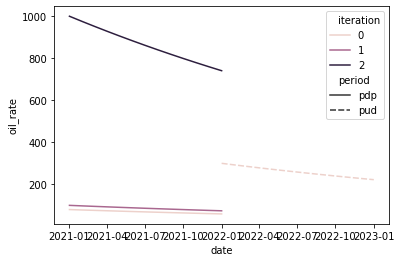

In [7]:
sns.lineplot(data=s1_f, x=s1_f.index.to_timestamp(), y='oil_rate', hue='iteration', style='period')

In [16]:
s1_c = s1.generate_cashflow()
s1_c[1].fcf()

,income,income,total_income,fix_opex,var_opex,fix_opex,var_opex,total_opex,total_capex,fcf,cum_fcf
2021-01,0.000000,0.000000,0.000000,-5000.0,0.000000,0.0,0.000000,-5000.000000,0,-5000.000000,-5.000000e+03
2021-02,183650.408691,0.000000,183650.408691,-5000.0,-15304.200724,0.0,0.000000,-20304.200724,0,163346.207967,1.583462e+05
2021-03,161903.381346,0.000000,161903.381346,-5000.0,-13491.948446,0.0,0.000000,-18491.948446,0,143411.432901,3.017576e+05
2021-04,174957.108038,0.000000,174957.108038,-5000.0,-14579.759003,0.0,0.000000,-19579.759003,0,155377.349035,4.571350e+05
2021-05,165121.375734,0.000000,165121.375734,-5000.0,-13760.114645,0.0,0.000000,-18760.114645,0,146361.261090,6.034963e+05
2021-06,166401.552897,0.000000,166401.552897,-5000.0,-13866.796075,0.0,0.000000,-18866.796075,0,147534.756822,7.510310e+05
2021-07,157046.796479,0.000000,157046.796479,-5000.0,-13087.233040,0.0,0.000000,-18087.233040,0,138959.563439,8.899906e+05
2021-08,158264.371862,0.000000,158264.371862,-5000.0,-13188.697655,0.0,0.000000,-18188.697655,0,140075.674207,1.030066e+06
2021-09,154282.821647,0.000000,154282.821647,-5000.0,-12856.901804,0.0,0.000000,-17856.901804,0,136425.919843,1.166492e+06
2021-10,145609.355619,0.000000,145609.355619,-5000.0,-12134.112968,0.0,0.000000,-17134.112968,0,128475.242651,1.294967e+06


In [17]:
for i in s1_c:
    print(i.income)

[CashFlow(name='income', const_value=[0.0, 146920.32695275228, 129522.70507709867, 139965.68643055417, 132097.10058734557, 133121.24231748065, 125637.4371832177, 126611.4974897234, 123426.25731726359, 116487.48449533487, 117390.60570980342, 110791.14492930625, 111650.10272888721], start=datetime.date(2021, 1, 31), end=datetime.date(2022, 1, 31), periods=None, freq='M', chgpts=None), CashFlow(name='income', const_value=[0.0, 550951.2260728211, 485710.14403911994, 524871.3241145781, 495364.127202546, 499204.65869055234, 471140.3894370665, 474793.11558646266, 462848.46493973775, 436828.06685750635, 440214.7714117632, 415466.79348489706, 418687.885233328], start=datetime.date(2022, 1, 31), end=datetime.date(2023, 1, 31), periods=None, freq='M', chgpts=None)]
[CashFlow(name='income', const_value=[0.0, 183650.40869094036, 161903.3813463733, 174957.1080381927, 165121.37573418205, 166401.5528968508, 157046.796479022, 158264.37186215437, 154282.8216465793, 145609.35561916884, 146738.2571372541,

In [19]:
s1_c[1].fcf()

,income,income,total_income,fix_opex,var_opex,fix_opex,var_opex,total_opex,total_capex,fcf,cum_fcf
2021-01,0.000000,0.000000,0.000000,-5000.0,0.000000,0.0,0.000000,-5000.000000,0,-5000.000000,-5.000000e+03
2021-02,183650.408691,0.000000,183650.408691,-5000.0,-15304.200724,0.0,0.000000,-20304.200724,0,163346.207967,1.583462e+05
2021-03,161903.381346,0.000000,161903.381346,-5000.0,-13491.948446,0.0,0.000000,-18491.948446,0,143411.432901,3.017576e+05
2021-04,174957.108038,0.000000,174957.108038,-5000.0,-14579.759003,0.0,0.000000,-19579.759003,0,155377.349035,4.571350e+05
2021-05,165121.375734,0.000000,165121.375734,-5000.0,-13760.114645,0.0,0.000000,-18760.114645,0,146361.261090,6.034963e+05
2021-06,166401.552897,0.000000,166401.552897,-5000.0,-13866.796075,0.0,0.000000,-18866.796075,0,147534.756822,7.510310e+05
2021-07,157046.796479,0.000000,157046.796479,-5000.0,-13087.233040,0.0,0.000000,-18087.233040,0,138959.563439,8.899906e+05
2021-08,158264.371862,0.000000,158264.371862,-5000.0,-13188.697655,0.0,0.000000,-18188.697655,0,140075.674207,1.030066e+06
2021-09,154282.821647,0.000000,154282.821647,-5000.0,-12856.901804,0.0,0.000000,-17856.901804,0,136425.919843,1.166492e+06
2021-10,145609.355619,0.000000,145609.355619,-5000.0,-12134.112968,0.0,0.000000,-17134.112968,0,128475.242651,1.294967e+06


In [11]:
s1.periods[0].generate_cashflow()

[CashFlowModel(name='pdp_0', income=[CashFlow(name='income', const_value=[0.0, 146920.32695275228, 129522.70507709867, 139965.68643055417, 132097.10058734557, 133121.24231748065, 125637.4371832177, 126611.4974897234, 123426.25731726359, 116487.48449533487, 117390.60570980342, 110791.14492930625, 111650.10272888721], start=datetime.date(2021, 1, 31), end=datetime.date(2022, 1, 31), periods=None, freq='M', chgpts=None)], opex=[CashFlow(name='fix_opex', const_value=-5000.0, start=datetime.date(2021, 1, 31), end=datetime.date(2022, 1, 31), periods=None, freq='M', chgpts=None), CashFlow(name='var_opex', const_value=[-0.0, -12243.360579396023, -10793.558756424889, -11663.80720254618, -11008.091715612132, -11093.436859790054, -10469.786431934808, -10550.958124143617, -10285.5214431053, -9707.290374611239, -9782.550475816952, -9232.59541077552, -9304.175227407268], start=datetime.date(2021, 1, 31), end=datetime.date(2022, 1, 31), periods=None, freq='M', chgpts=None)], capex=None),
 CashFlowMod